In [ ]:
#패키지를 불러옵니다.
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib as mpl

#주피터 노트북내에 그림을 표시 합니다.
%matplotlib inline

# 폰트 설정
mpl.rc('font', family='Malgun Gothic')

#그래프의 폰트를 선명하게 출력합니다.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 그래프 음수값 깨짐 방지
mpl.rc('axes', unicode_minus=False)

In [ ]:
# #한글 폰트 설치(colab)
# !apt -qq -y install fonts-nanum
 
# import matplotlib.font_manager as fm
# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# plt.rc('font', family='NanumBarunGothic') 
# mpl.font_manager._rebuild()


In [39]:
#데이터 불러오기
data = pd.read_csv("data/@preprocessing_data_member01.csv", encoding = 'utf-8')

In [73]:
data.head()

,Unnamed: 0,ID,총구매수량_x,기타품목구매비율,수저류구매비율,실링구매비율,용기류구매비율,위생용품구매비율,총구매횟수,총판매액,...,최종주문연도,최종주문월,최종주문일자,최종주문요일,최종주문시간,회원가입일(clean),가입연도,가입월,가입일자,가입요일
0,0,100304734@n,1.0,0.0,0.0,0.0,1.0,0.0,1,103300,...,2019.0,5.0,9.0,Thursday,14.0,2019-05-09 00:00:00,2019.0,5.0,9.0,Thursday
1,1,1003409866@k,62.0,0.0,0.0,0.0,1.0,0.0,18,4303880,...,2019.0,5.0,28.0,Tuesday,16.0,2019-01-07 00:00:00,2019.0,1.0,7.0,Monday
2,2,100381931@n,5.0,0.0,0.0,0.0,0.0,1.0,3,71050,...,2019.0,2.0,10.0,Sunday,21.0,2018-10-31 00:00:00,2018.0,10.0,31.0,Wednesday
3,3,1004498382@k,1.0,0.0,0.0,0.0,1.0,0.0,1,76400,...,2019.0,1.0,9.0,Wednesday,12.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday
4,4,1004547839@k,4.0,1.0,0.0,0.0,0.0,0.0,1,360800,...,2019.0,1.0,9.0,Wednesday,13.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday


In [9]:
data.columns

Index(['Unnamed: 0', 'ID', '총구매수량_x', '기타품목구매비율', '수저류구매비율', '실링구매비율',
       '용기류구매비율', '위생용품구매비율', '총구매횟수', '총판매액', '총할인금액', '총순수이익', '나이',
       '사용가능 적립금', '성별', '최종접속일', '최종주문일', '유입경로', '유입기기', '회원 가입일', '사업자구분',
       '회원구분', '지역', '세부지역', '주소', '최종주문일(clean)', '최종주문연도', '최종주문월', '최종주문일자',
       '최종주문요일', '최종주문시간', '회원가입일(clean)', '가입연도', '가입월', '가입일자', '가입요일'],
      dtype='object')

In [33]:
data.describe()

,Unnamed: 0,총구매수량_x,기타품목구매비율,수저류구매비율,실링구매비율,용기류구매비율,위생용품구매비율,총구매횟수,총판매액,총할인금액,총순수이익,나이,사용가능 적립금,최종주문연도,최종주문월,최종주문일자,최종주문시간,가입연도,가입월,가입일자
count,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4.924000e+03,4.924000e+03,4.924000e+03,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000
mean,2467.350122,10.370431,0.046973,0.040044,0.020072,0.692333,0.200570,4.135053,6.048520e+05,7.483145e+04,2.476685e+05,39.293867,2126.745735,2018.558083,5.359261,16.875711,13.903737,2018.266044,5.720349,15.908408
std,1424.589929,21.524662,0.158107,0.115471,0.106260,0.292920,0.236628,7.090764,1.360792e+06,1.939142e+05,7.088031e+05,8.544393,4738.568058,0.576538,2.993509,8.734790,4.186792,0.577435,3.437493,8.737182
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,-5.895700e+05,21.000000,-1790.000000,2017.000000,1.000000,1.000000,0.000000,2017.000000,1.000000,1.000000
25%,1234.750000,2.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1.000000,9.685000e+04,0.000000e+00,2.701500e+04,32.000000,0.000000,2018.000000,3.000000,9.000000,11.000000,2018.000000,3.000000,8.000000
50%,2467.500000,4.000000,0.000000,0.000000,0.000000,0.714000,0.138000,2.000000,2.044700e+05,2.181000e+04,6.362500e+04,40.000000,1110.000000,2019.000000,5.000000,17.000000,14.000000,2018.000000,5.000000,16.000000
75%,3700.250000,9.000000,0.000000,0.000000,0.000000,1.000000,0.333000,4.000000,5.380450e+05,6.405000e+04,1.813025e+05,46.000000,2350.000000,2019.000000,7.000000,24.000000,17.000000,2019.000000,9.000000,24.000000
max,4935.000000,376.000000,1.000000,1.000000,1.000000,1.000000,1.000000,125.000000,2.848858e+07,3.884210e+06,1.417787e+07,92.000000,125490.000000,2019.000000,12.000000,31.000000,23.000000,2019.000000,12.000000,31.000000


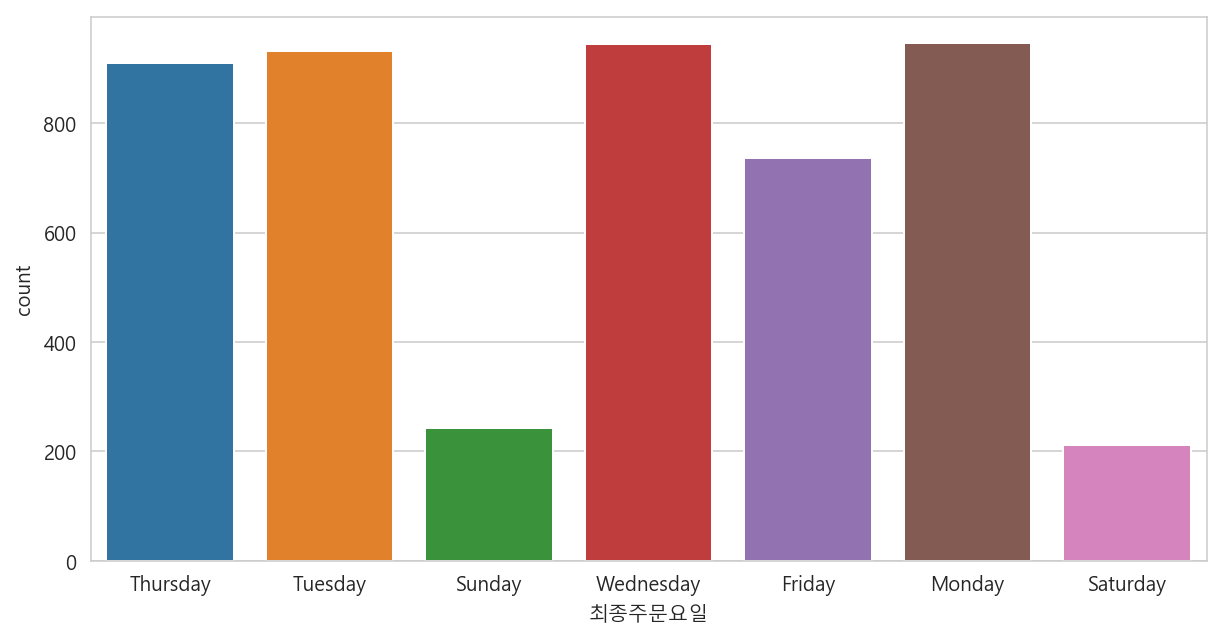

In [40]:
#그래프 사이즈를 n X m (inch)로 그립니다. 
plt.figure(figsize = [10, 5])
#data의 '최종주문요일' Columns에 대해 countplot을 그립니다.
sns.countplot(data['최종주문요일'])

hue = 다른 columns의 항목을 Overlay 중첩 시켜 시각화 시킨다.   
color = 그래프에 색상을 입혀 준다.

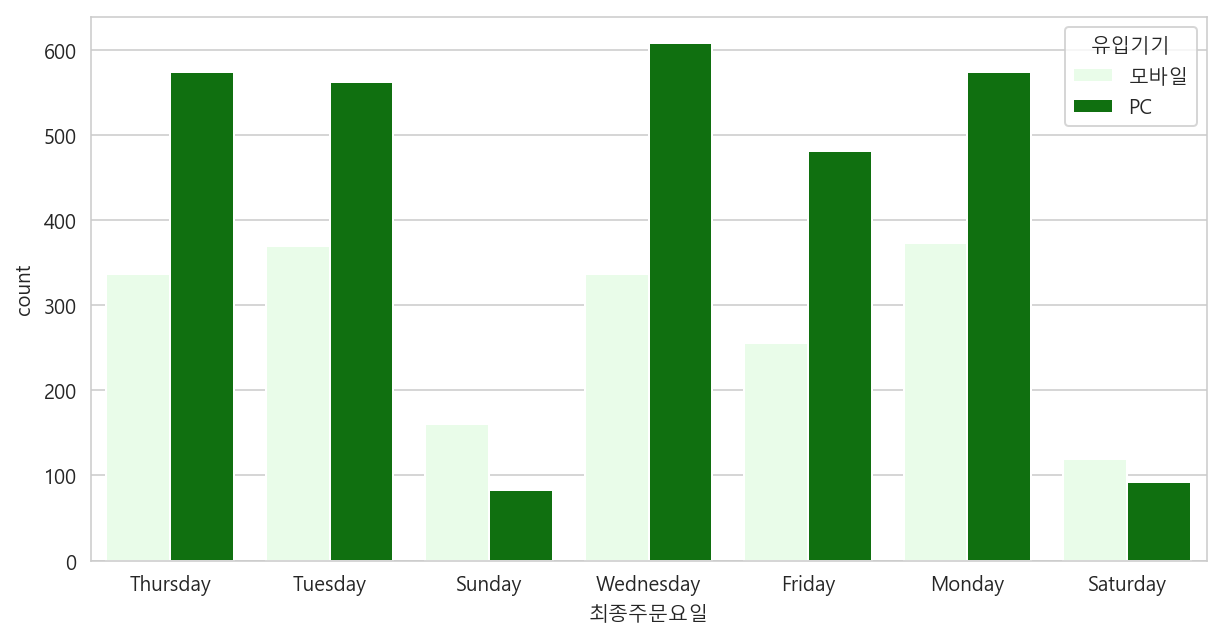

In [45]:
# 그래프 사이즈를 n X m (inch)로 그립니다. 
plt.figure(figsize = [10, 5])
# data의 유입기기별 최종주문요일에 대해서 확인하고 녹색으로 그래프를 그려줍니다.
sns.countplot(data = data , x = '최종주문요일', hue = '유입기기', color = 'g')

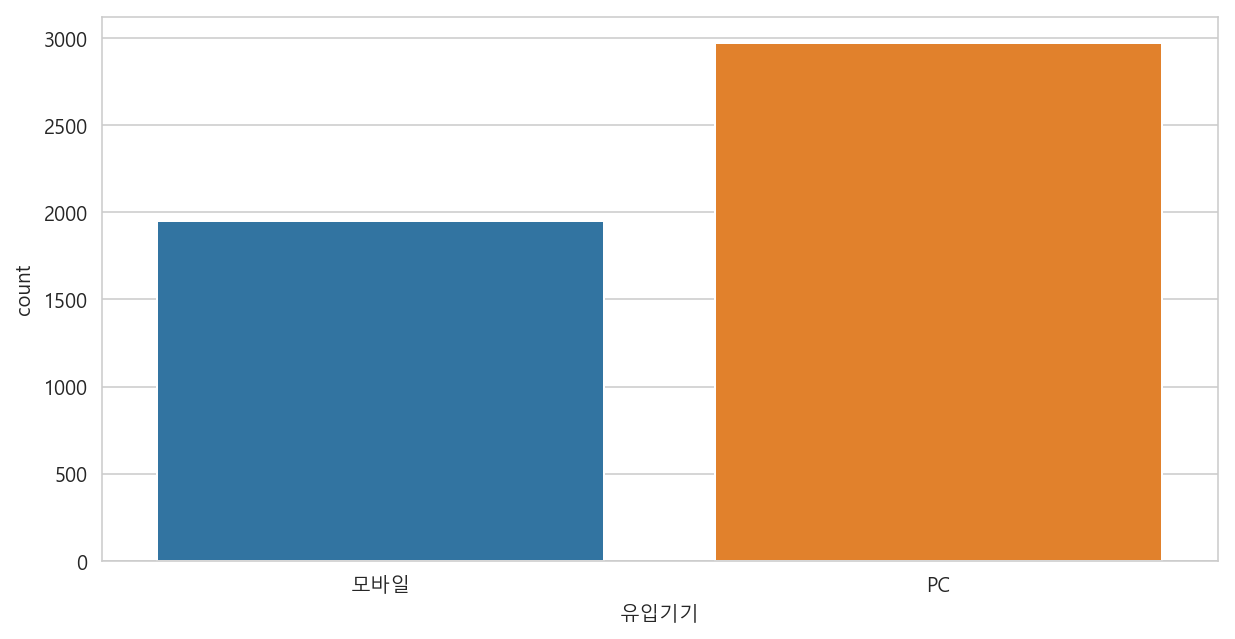

In [42]:
plt.figure(figsize = [10, 5])
sns.countplot(data['유입기기'])

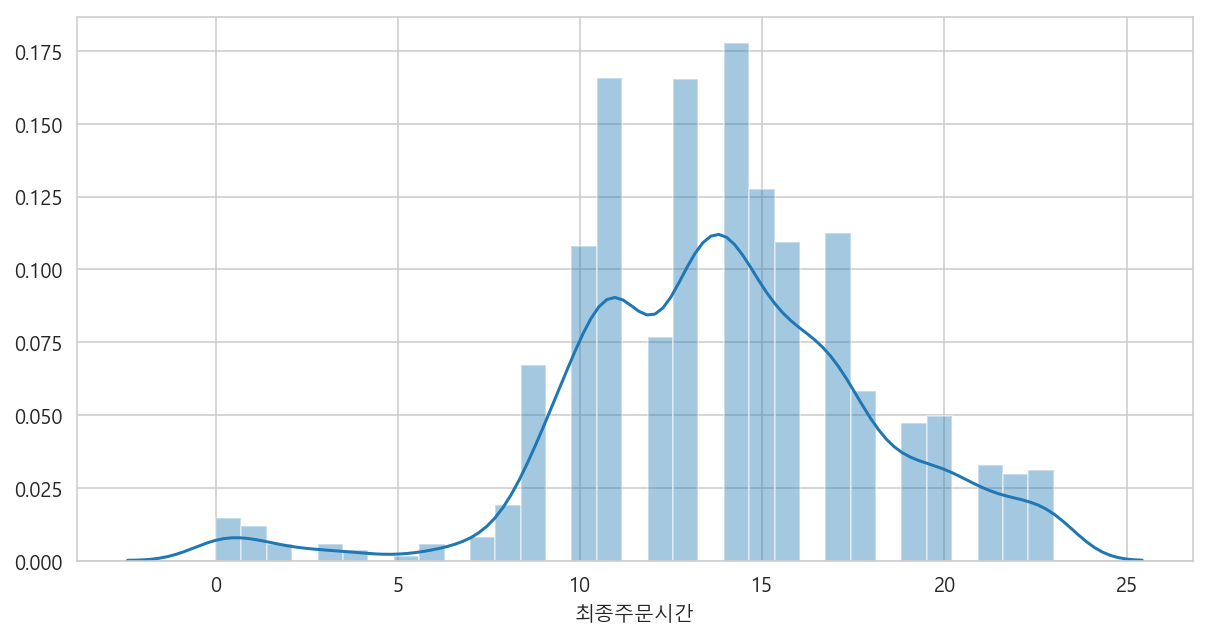

In [56]:
plt.figure(figsize = [10, 5])
sns.distplot(data['최종주문시간'])

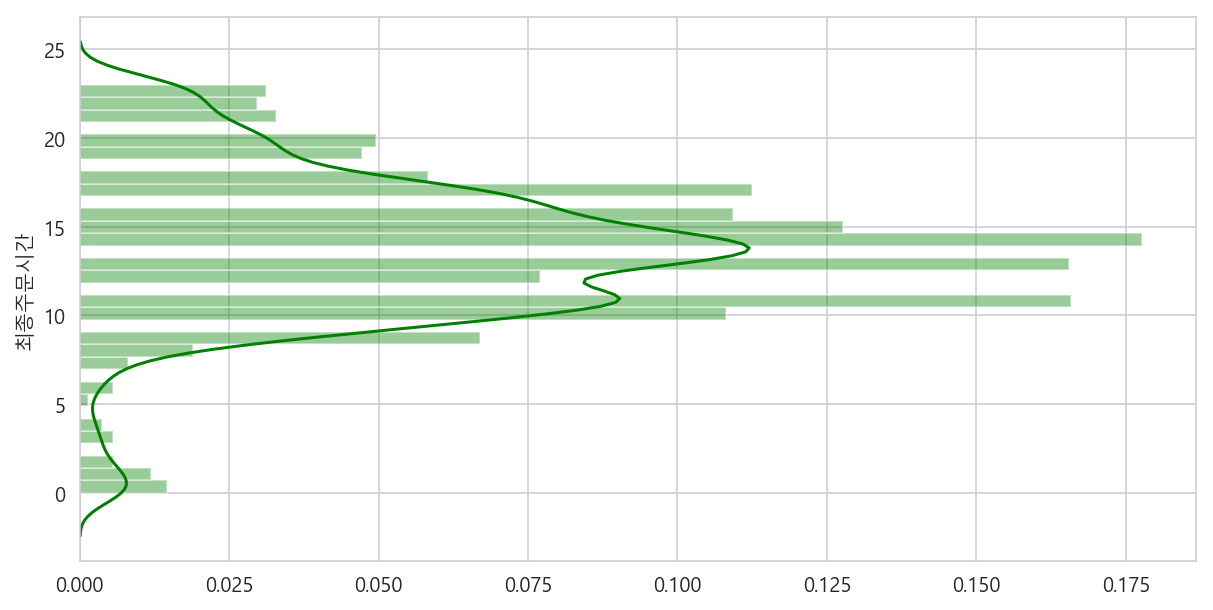

In [58]:
plt.figure(figsize = [10, 5])
sns.distplot(data['최종주문시간'], vertical = True, color = 'g')

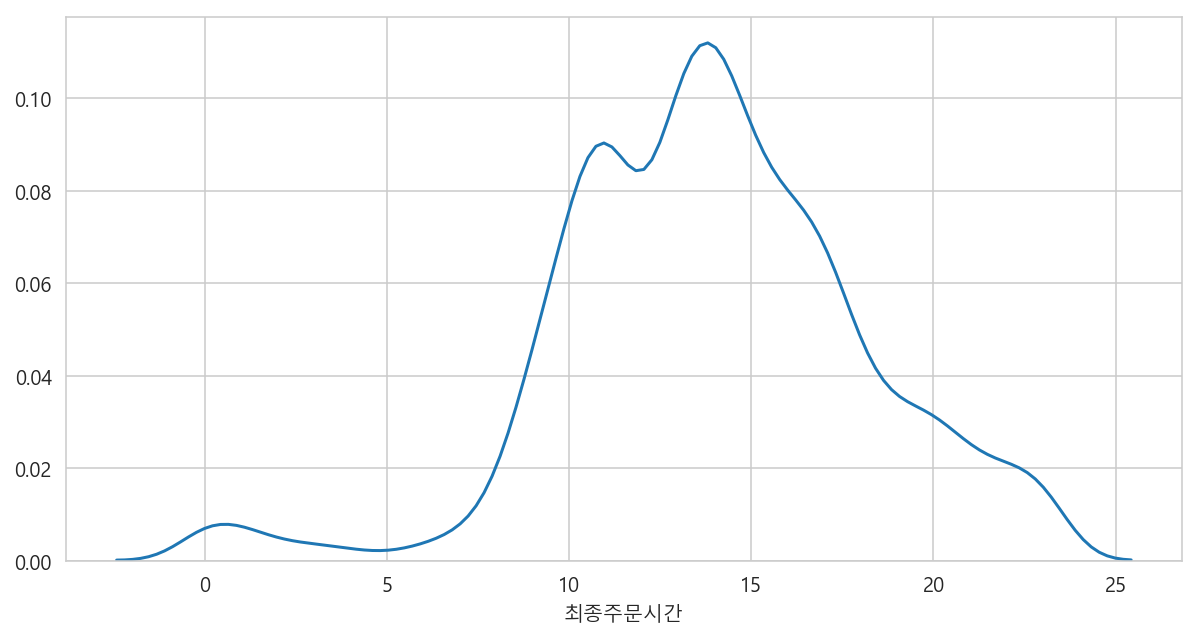

In [59]:
plt.figure(figsize = [10, 5])
sns.distplot(data['최종주문시간'], hist = False)

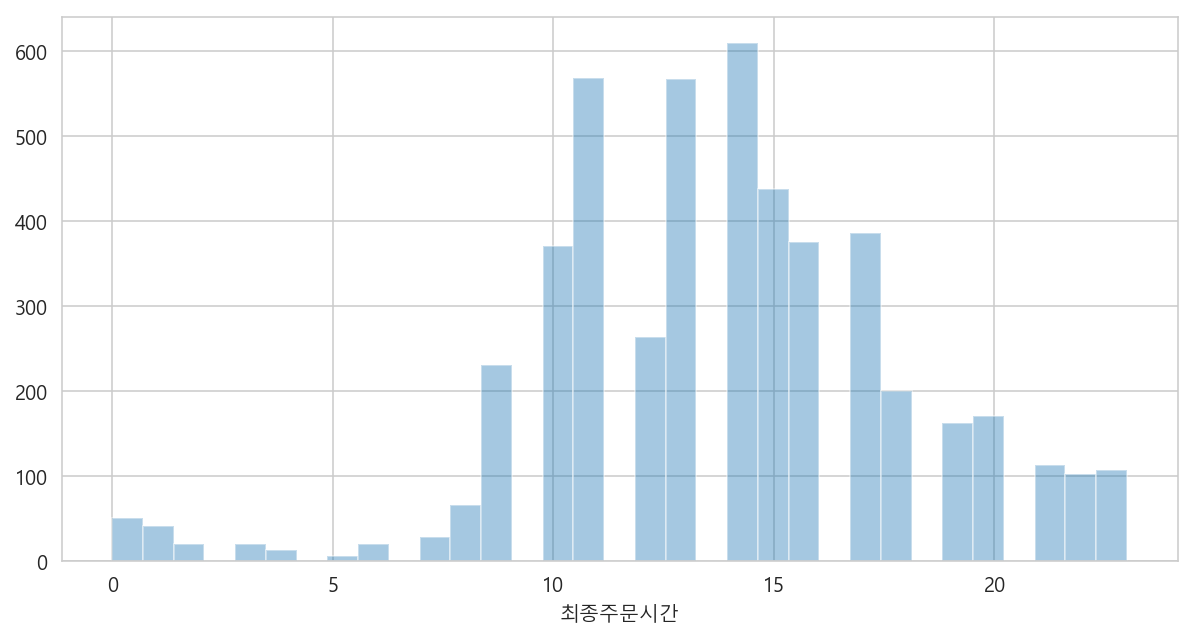

In [61]:
plt.figure(figsize = [10, 5])
sns.distplot(data['최종주문시간'], kde = False)

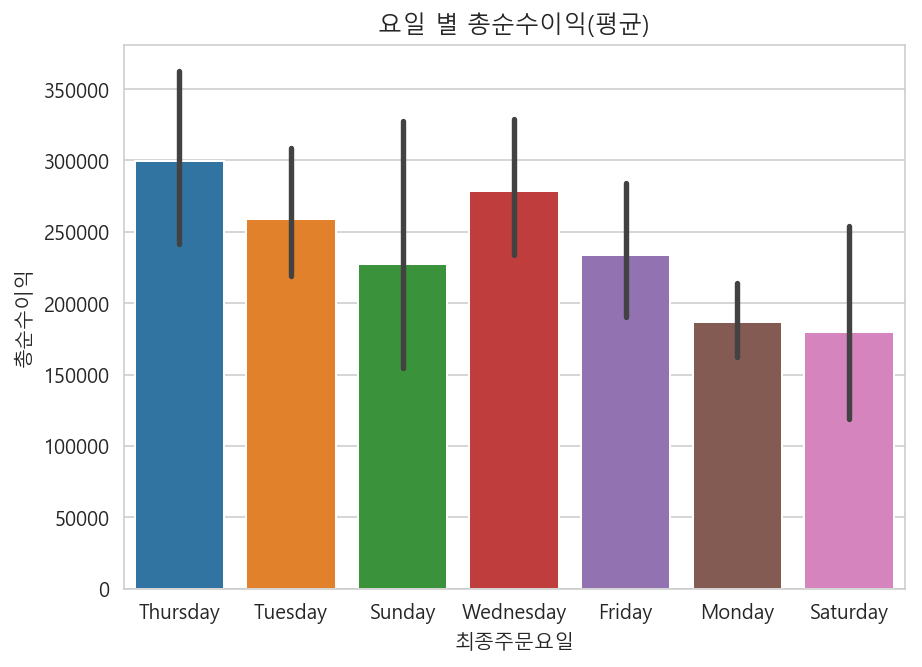

In [74]:
plt.figure(figsize = [7, 5])
sns.barplot( data=data, x='최종주문요일', y="총순수이익")
plt.title("요일 별 총순수이익(평균)")
plt.show()

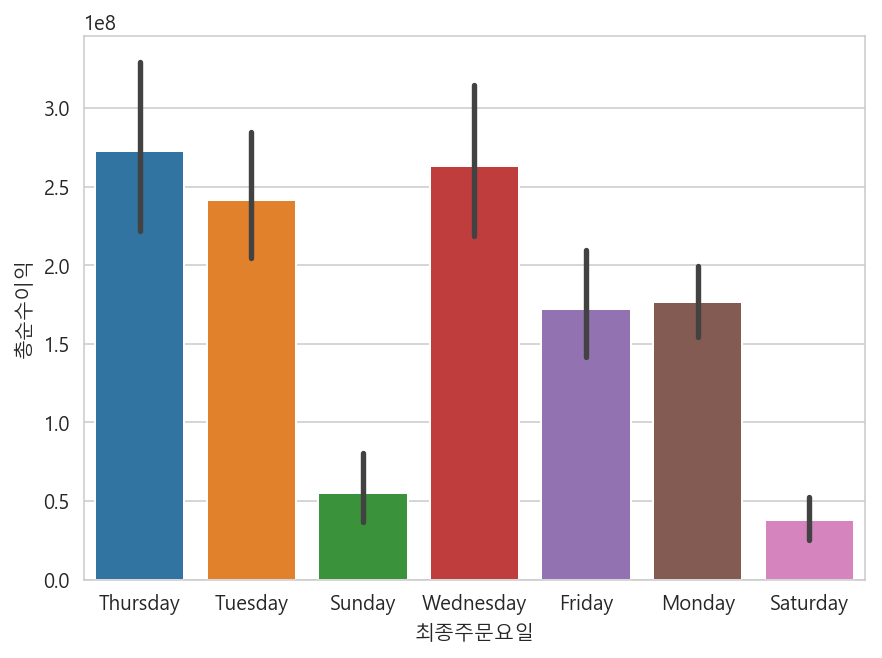

In [87]:
plt.figure(figsize = [7, 5])
sns.barplot( data=data, x='최종주문요일', y="총순수이익", estimator = sum)
plt.show()

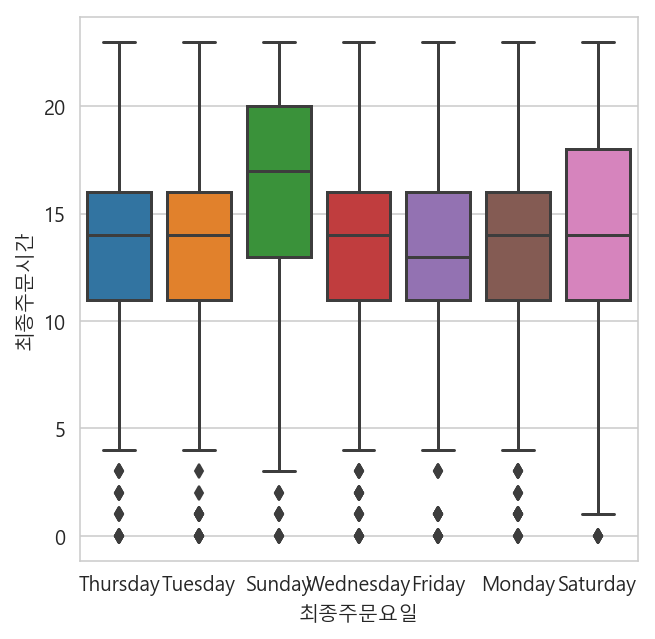

In [119]:
plt.figure(figsize = [5, 5])
sns.boxplot( data=data, x='최종주문요일', y="최종주문시간")
plt.show()

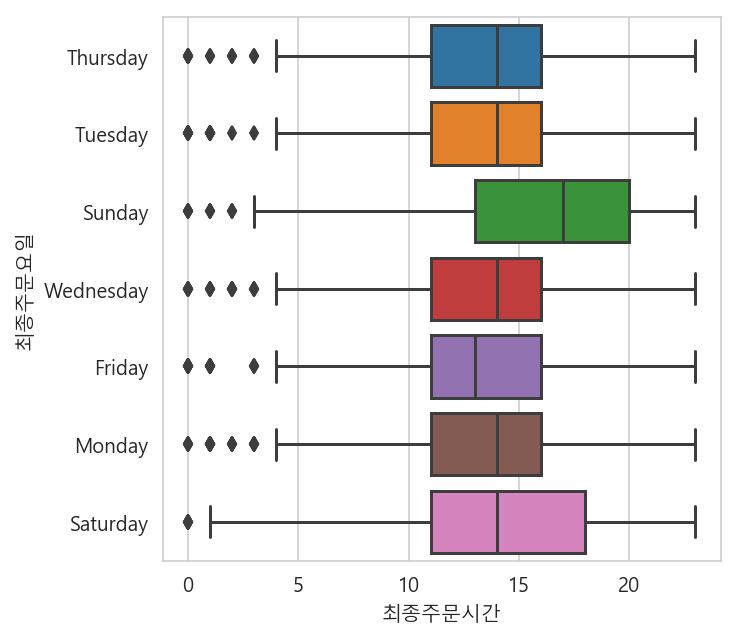

In [88]:
plt.figure(figsize = [5, 5])
sns.boxplot( data=data, y='최종주문요일', x="최종주문시간")
plt.show()

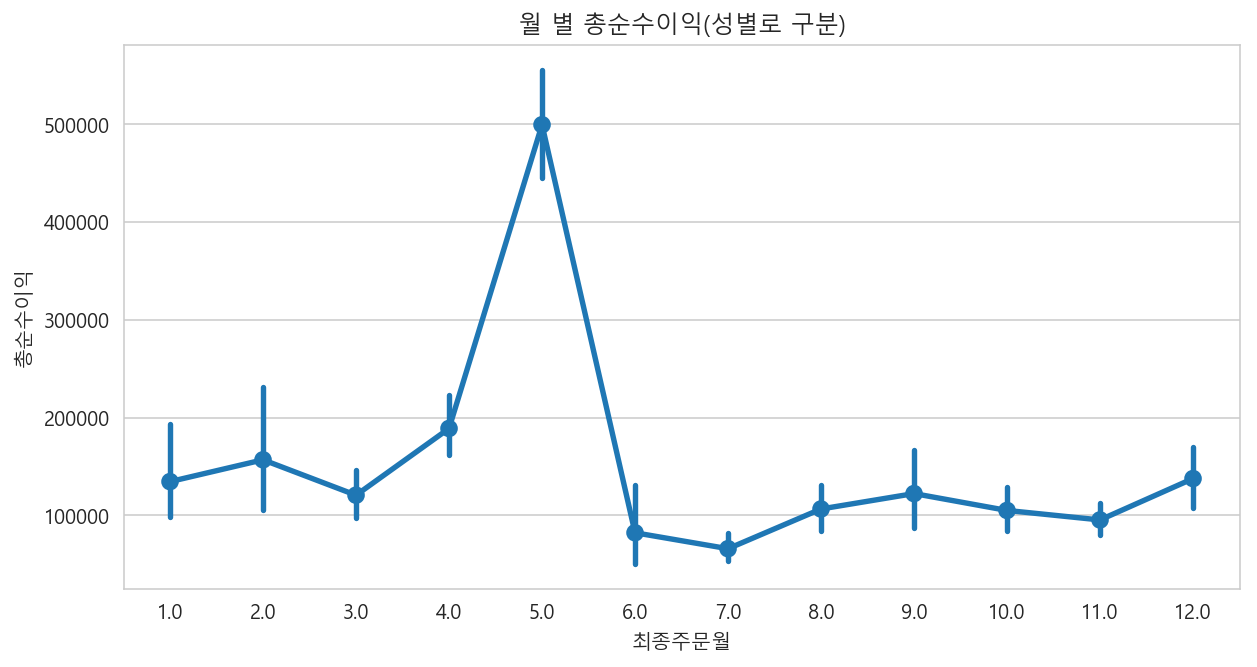

In [97]:
plt.figure(figsize = [10, 5])
sns.pointplot( data=data, x="최종주문월", y='총순수이익' )
plt.title("월 별 총순수이익(성별로 구분)")
plt.show()

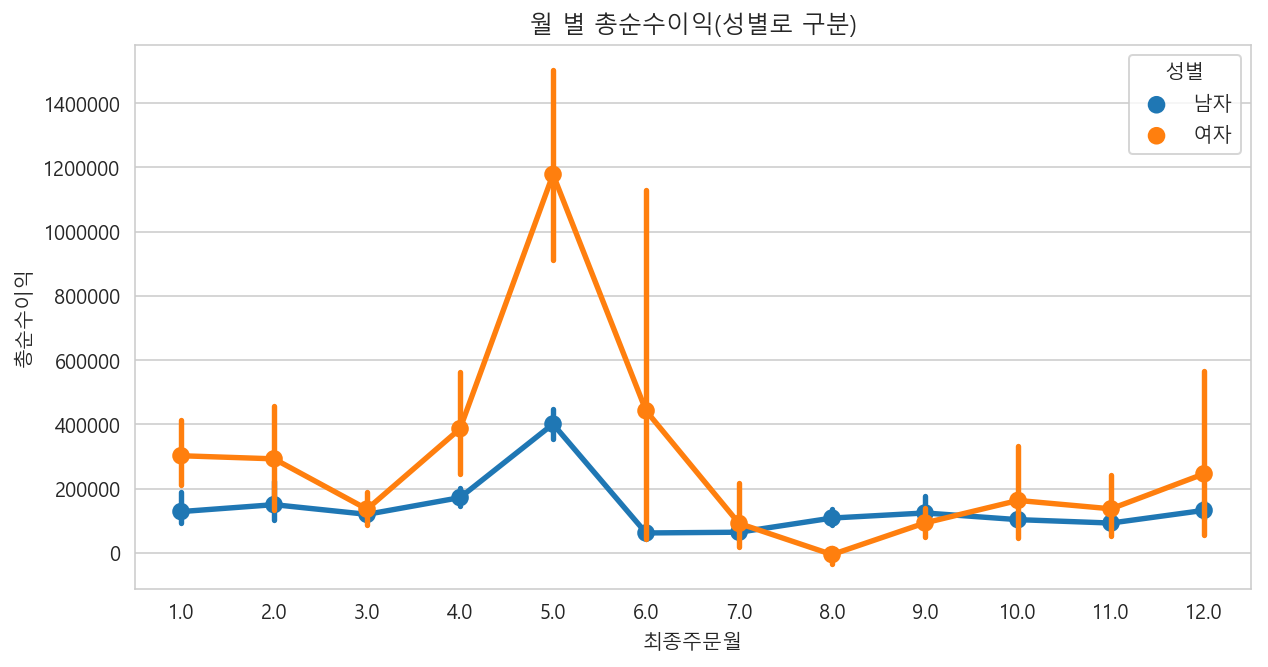

In [99]:
plt.figure(figsize = [10, 5])
sns.pointplot( data=data, x="최종주문월", y='총순수이익', hue = '성별' )
plt.title("월 별 총순수이익(성별로 구분)")
plt.show()

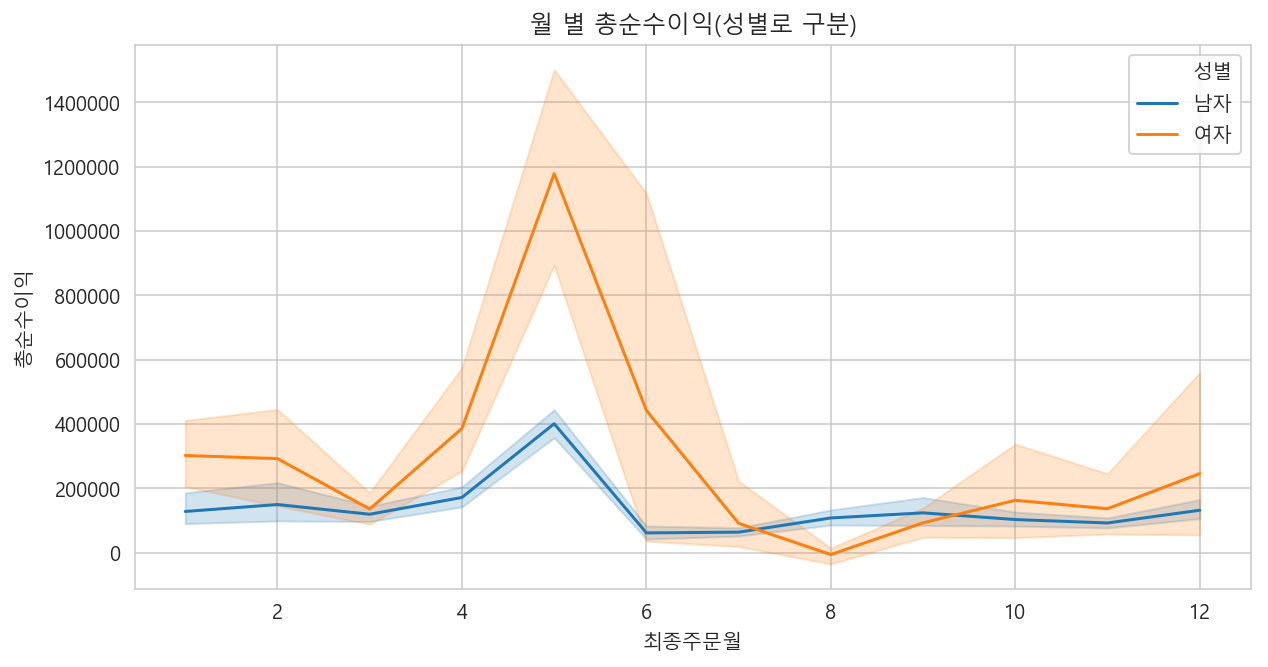

In [109]:
plt.figure(figsize = [10, 5])
sns.lineplot( data=data, x="최종주문월", y='총순수이익', hue = '성별' )
plt.title("월 별 총순수이익(성별로 구분)")
plt.show()

In [91]:
data.columns

Index(['Unnamed: 0', 'ID', '총구매수량_x', '기타품목구매비율', '수저류구매비율', '실링구매비율',
       '용기류구매비율', '위생용품구매비율', '총구매횟수', '총판매액', '총할인금액', '총순수이익', '나이',
       '사용가능 적립금', '성별', '최종접속일', '최종주문일', '유입경로', '유입기기', '회원 가입일', '사업자구분',
       '회원구분', '지역', '세부지역', '주소', '최종주문일(clean)', '최종주문연도', '최종주문월', '최종주문일자',
       '최종주문요일', '최종주문시간', '회원가입일(clean)', '가입연도', '가입월', '가입일자', '가입요일'],
      dtype='object')

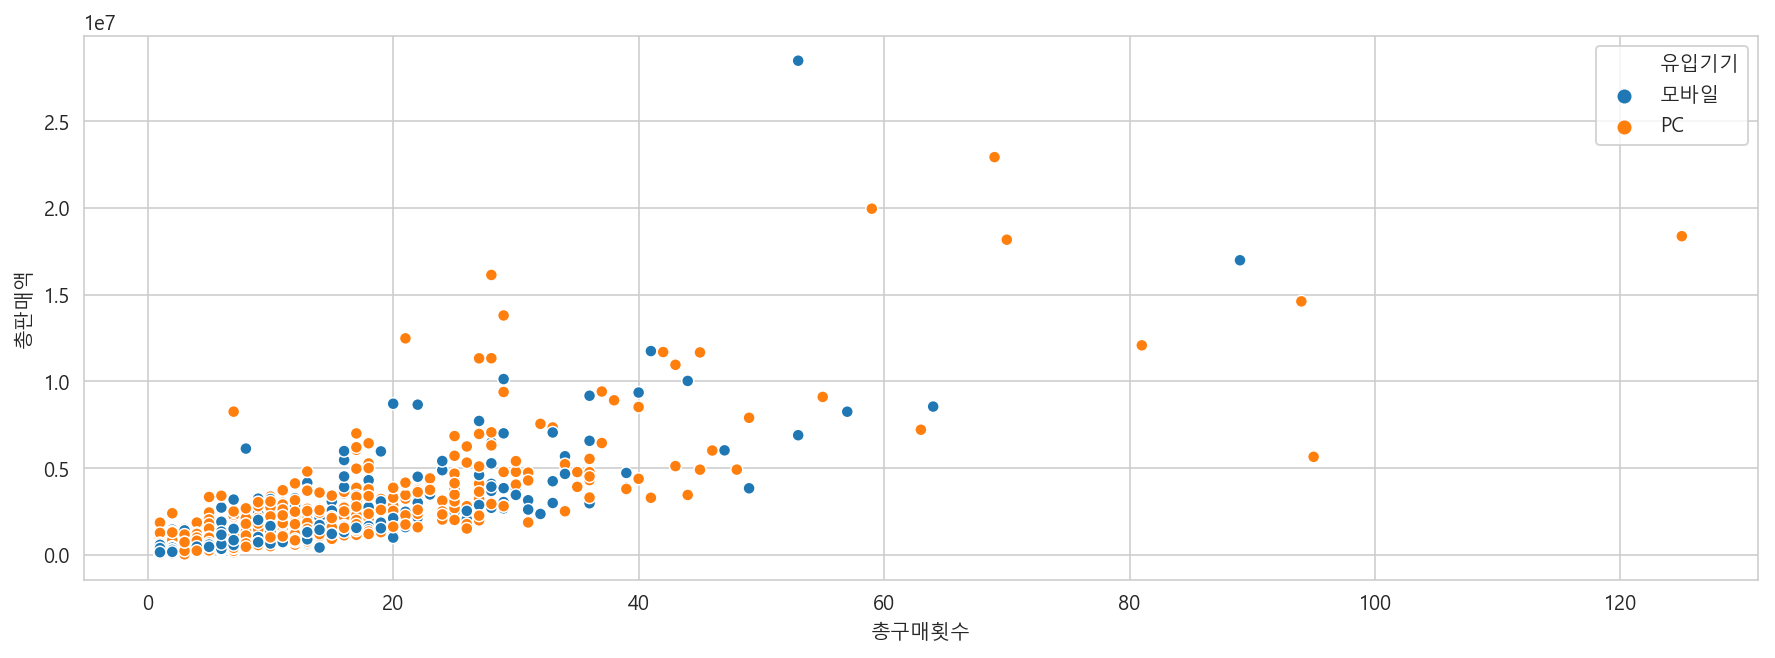

In [118]:
plt.figure(figsize = [15, 5])
sns.scatterplot( data=data, x="총구매횟수", y='총판매액', hue = '유입기기' )
plt.show()

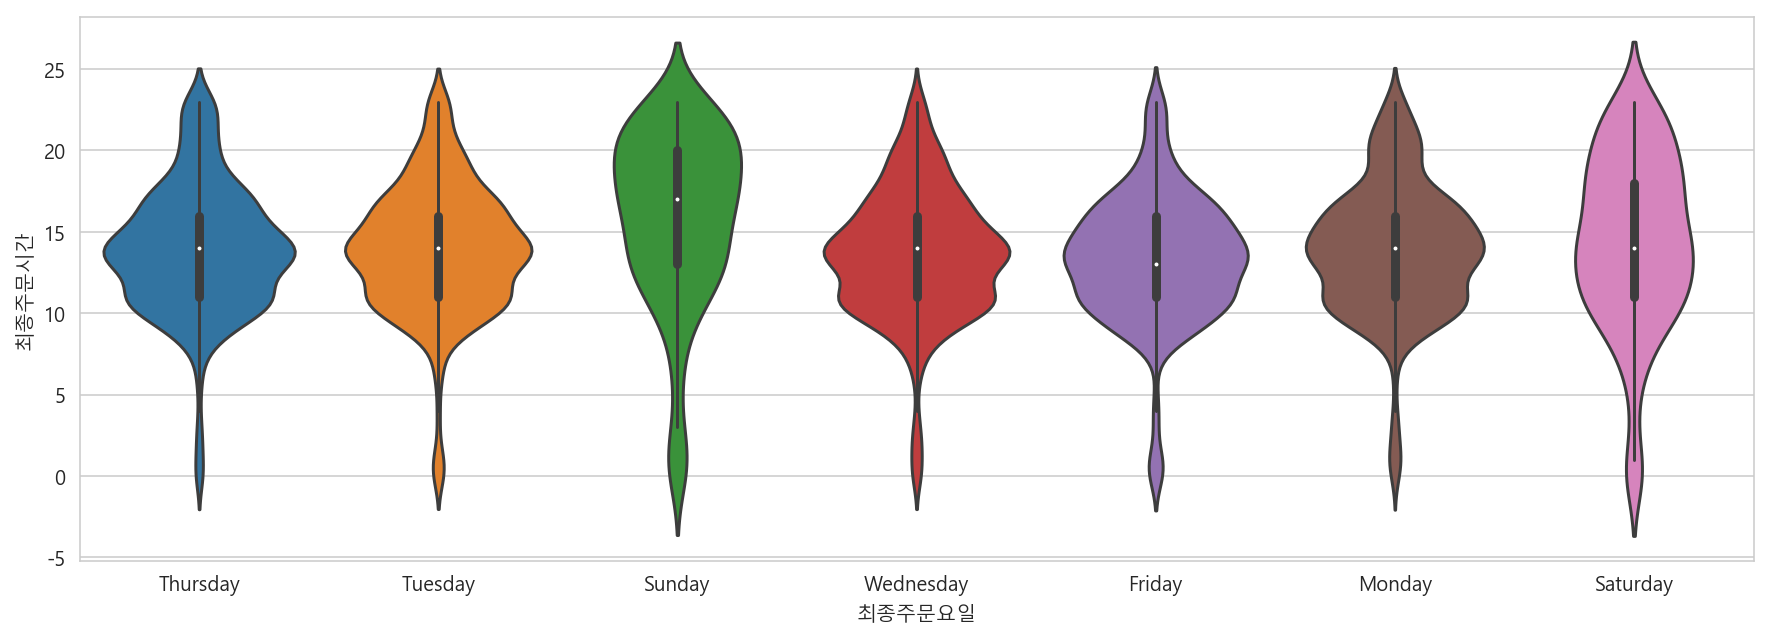

In [121]:
plt.figure(figsize = [15, 5])
sns.violinplot( data=data, x='최종주문요일', y="최종주문시간")
plt.show()